# Node and Graph Embeddings with Color Refinement
 
This is a technique for embedding node attributes and local neighborhoods such that when two nodes have the same color there is an arbitrarily close to 100% chance that they have identical local neighborhoods.
 
Primarily based on this lecture:

Stanford Online, Professor Jure Leskovec
[CS224W: Machine Learning with Graphs | 2021 | Lecture 2.3 - Traditional Feature-based Methods: Graph](https://www.youtube.com/watch?v=buzsHTa4Hgs&t=701s)
   

[Source Code for ColorRefinment](https://github.com/parkerburchett/TDC-DeepLearning/blob/main/utils/ColorRefinement.py) 

In [17]:
import ColorRefinement as cr
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from pysmiles import read_smiles

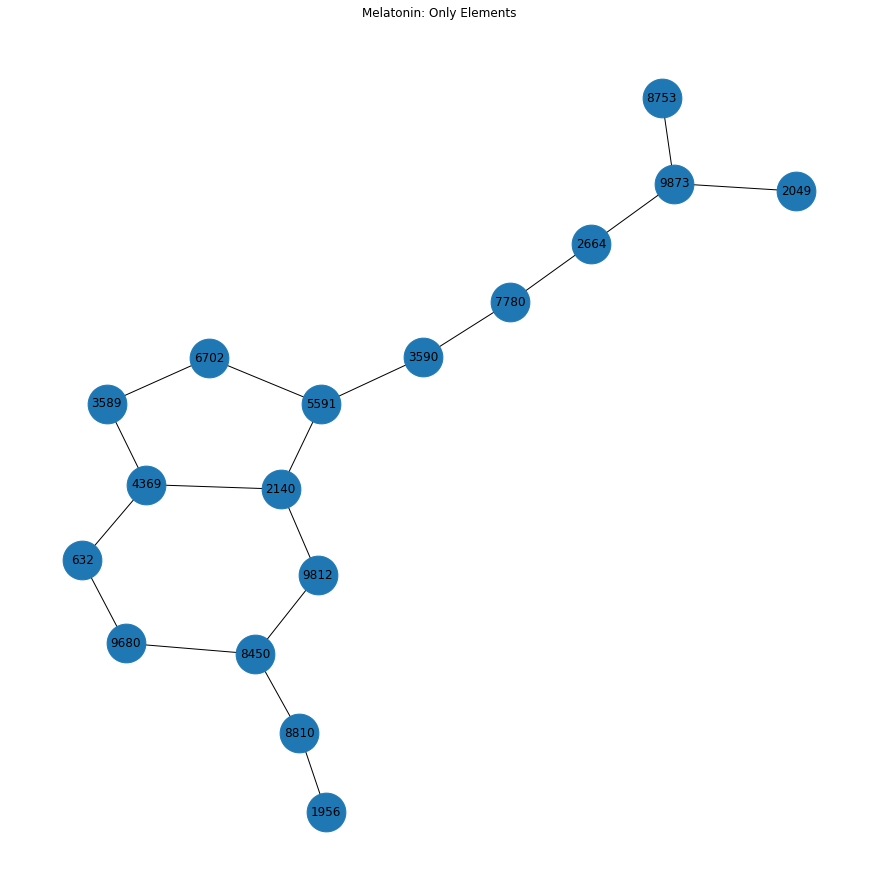

In [27]:
melatonin ='CC(=O)NCCC1=CNc2c1cc(OC)cc2'
#https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system

mol = read_smiles(melatonin)# Node and Graph Embeddings with Color Refinement

for n in mol.nodes:
    del mol.nodes[n]['charge']
    del mol.nodes[n]['hcount']
    del mol.nodes[n]['aromatic']


plt.figure(figsize=(12,12)) 
nx.draw_kamada_kawai(mol,labels=labels,node_size=1500)
plt.title('Melatonin: Only Elements')
plt.show()

# Color Refinement

In [31]:
color_graph = cr.compute_K_color_refinements(G=mol,K=5, num_buckets=10000)
# returns a graph of the same structure after running the ColorRefinement Algorithm 5 times with 10 thousand possible colors.
color_graph.nodes.data(True)

NodeDataView({0: {'color_0': 8392, 'color_1': 7812, 'color_2': 2049, 'color_3': 5057, 'color_4': 8756}, 1: {'color_0': 8392, 'color_1': 4808, 'color_2': 9873, 'color_3': 551, 'color_4': 8037}, 2: {'color_0': 6937, 'color_1': 221, 'color_2': 8753, 'color_3': 9599, 'color_4': 6567}, 3: {'color_0': 6912, 'color_1': 7249, 'color_2': 2664, 'color_3': 7562, 'color_4': 4508}, 4: {'color_0': 8392, 'color_1': 4396, 'color_2': 7780, 'color_3': 7364, 'color_4': 7292}, 5: {'color_0': 8392, 'color_1': 1008, 'color_2': 3590, 'color_3': 9672, 'color_4': 4122}, 6: {'color_0': 8392, 'color_1': 1013, 'color_2': 5591, 'color_3': 4699, 'color_4': 5784}, 7: {'color_0': 8392, 'color_1': 4396, 'color_2': 6702, 'color_3': 2159, 'color_4': 3434}, 8: {'color_0': 6912, 'color_1': 7249, 'color_2': 3589, 'color_3': 7646, 'color_4': 1386}, 9: {'color_0': 8392, 'color_1': 8183, 'color_2': 4369, 'color_3': 9412, 'color_4': 8464}, 10: {'color_0': 8392, 'color_1': 1013, 'color_2': 2140, 'color_3': 961, 'color_4': 1993}

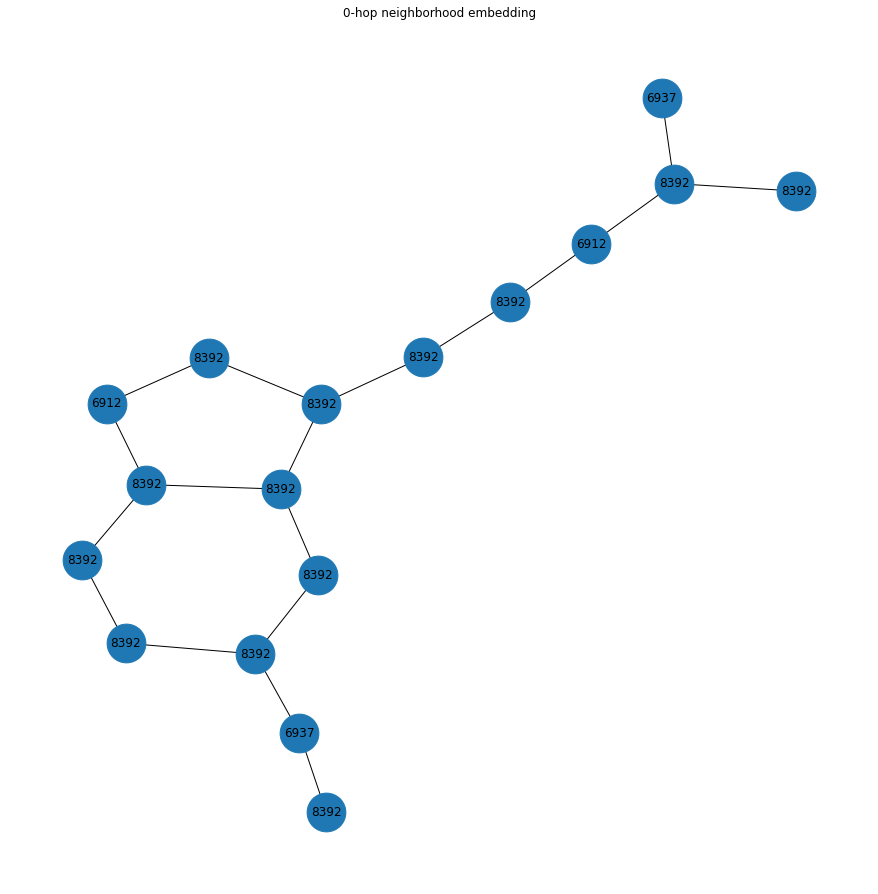

In [ ]:
labels = nx.get_node_attributes(color_graph, 'color_0') 
plt.figure(figsize=(12,12)) 
nx.draw_kamada_kawai(color_graph,labels=labels,node_size=1500)
plt.title('0-hop neighborhood embedding')
plt.show()

Each integer corresponds to a neighborhood of size 0 (only that element). Because there are only 3 elements there are only 3 integers.


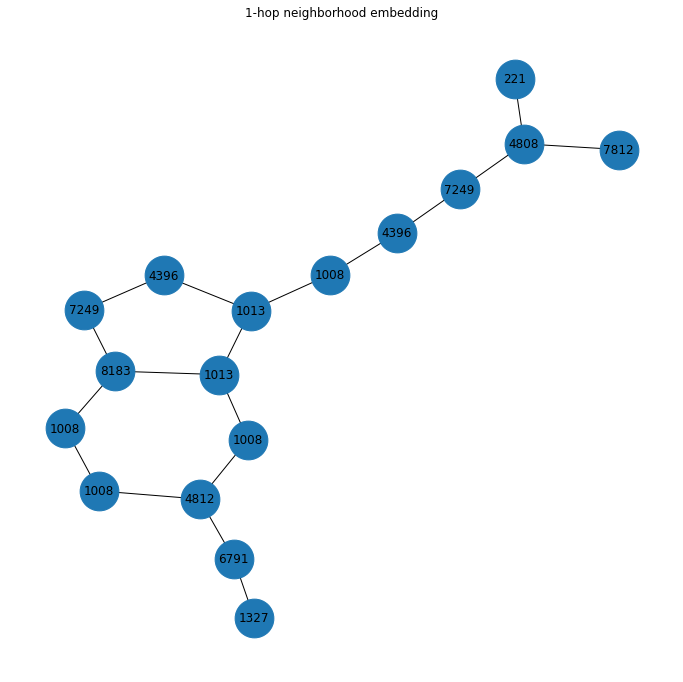

In [ ]:
labels = nx.get_node_attributes(color_graph, 'color_1') 
plt.figure(figsize=(12,12)) 
plt.title('1-hop neighborhood embedding')
nx.draw_kamada_kawai(color_graph,labels=labels,node_size=1500)
plt.show()

Now each integer corrponds to a unique 1-hop neighborhood. There are more unique nieghborhood since there are many more combinations of 1 hop neighborhoods than with 0. For example, many of the Carbons have the same 1 hop neighborhoods.

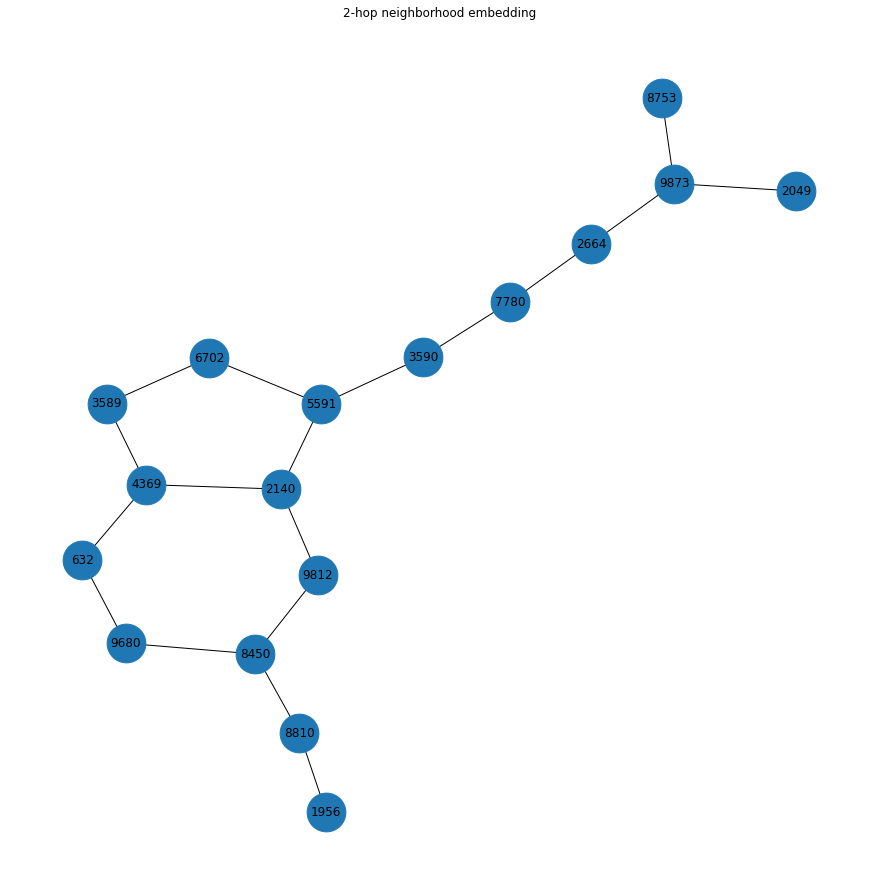

In [ ]:
labels = nx.get_node_attributes(color_graph, 'color_2') 
plt.figure(figsize=(12,12)) 
nx.draw_kamada_kawai(color_graph,labels=labels,node_size=1500)
plt.title('2-hop neighborhood embedding')
plt.show()

Each integer corresponds to a unique 2 hop neighborhood.
 
There are no two nodes that have identical 2 hop neighborhoods around them. 

# Questions

1. How readable is ColorRefinements.py?
2. Is the hash function solid? I want all neighborhoods to hash into close to random buckets.
3. Help with the math for calculating False Positives.
4. What other features should I add?
5. An idea for the optimal value for K? 

In [49]:
cr.embedd_graph_with_color_refinement(mol,1,10000).sum(0).sort_values(ascending=False).head(15)

8392    13
6912     2
6937     2
6668     0
6662     0
6663     0
6664     0
6665     0
6666     0
6667     0
6669     0
6660     0
6670     0
6671     0
6672     0
dtype: object

In [48]:
cr.embedd_graph_with_color_refinement(mol,2,10000).loc['color_1',:].sort_values(ascending=False).head(15)

1008    4
4396    2
1013    2
7249    2
7812    1
1327    1
221     1
8183    1
4808    1
4812    1
6791    1
6704    0
6703    0
6657    0
6709    0
Name: color_1, dtype: object

In [50]:
cr.embedd_graph_with_color_refinement(mol,3,10000).loc['color_2',:].sort_values(ascending=False).head(15)
# there are no nodes that have the same 2 hop neighborhood

632     1
5591    1
8450    1
7780    1
2140    1
9812    1
6702    1
2049    1
3589    1
3590    1
2664    1
9873    1
1956    1
8810    1
9680    1
Name: color_2, dtype: object